In [1]:
library(Ragas)
library(ggplot2)
library(cowplot)

Loading required package: Seurat

Attaching SeuratObject

Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

Registered S3 methods overwritten by 'car':
  method     

In [2]:
load('colors.RData')

## Load total CD4 object

In [3]:
cd4.harmony.clean <- readRDS('sorted.cd4.total.rds')

In [4]:
cd4.harmony.clean

An object of class Seurat 
26053 features across 239473 samples within 1 assay 
Active assay: RNA (26053 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [5]:
names(cd4.harmony.clean[[]])

[1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "Cohort"                     
 [5] "Gender"                      "Age"                        
 [7] "Ethnicity_Race"              "Nephritis_Class"            
 [9] "Batch"                       "Group"                      
[11] "Activation"                  "Subject_ID"                 
[13] "Sample_ID"                   "SLEDAI"                     
[15] "MDG"                         "percent.mt"                 
[17] "doublet_score"               "theshold"                   
[19] "predicted_doublet"           "predicted.celltype.l3"      
[21] "predicted.celltype.l3.score" "mapping.score"              
[23] "Dataset"                     "Group_LN"                   
[25] "SLEDAI.num"                  "Group_SLEDAI"               
[27] "percent.mt.cat"              "RNA_snn_res.0.5"            
[29] "seurat_clusters"             "clusters_grouped"

## Figure 1b

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



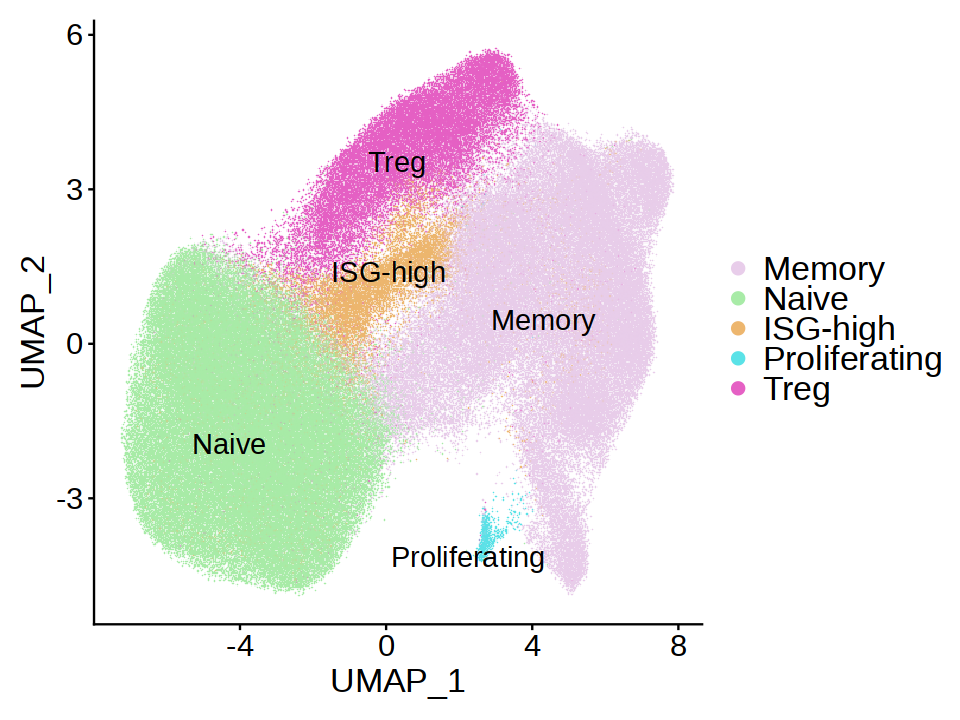

In [6]:
options(repr.plot.width = 8, repr.plot.height = 6)
p1 <- RunDimPlot(cd4.harmony.clean, label = TRUE, group.by = 'clusters_grouped', pt.size = 1.2,label.size =6, cols = cols.main.clus) + 
      theme(plot.title = element_blank(), legend.text = element_text(size = 20), axis.text = element_text(size = 18), axis.title = element_text(size = 20))
p1

## Figure 1c

In [7]:
select.cd4.markers <- list(Naive = c("CCR7","LEF1","SELL","TCF7"),
                           Memory = c("S100A4"),
                           Treg = c("FOXP3","IKZF2","IL2RA"),
                           ISG = c("ISG15", "ISG20","IFI44L","IFI6"),
                           Proliferating = c("PCNA","TOP2A","MCM6","MKI67"))

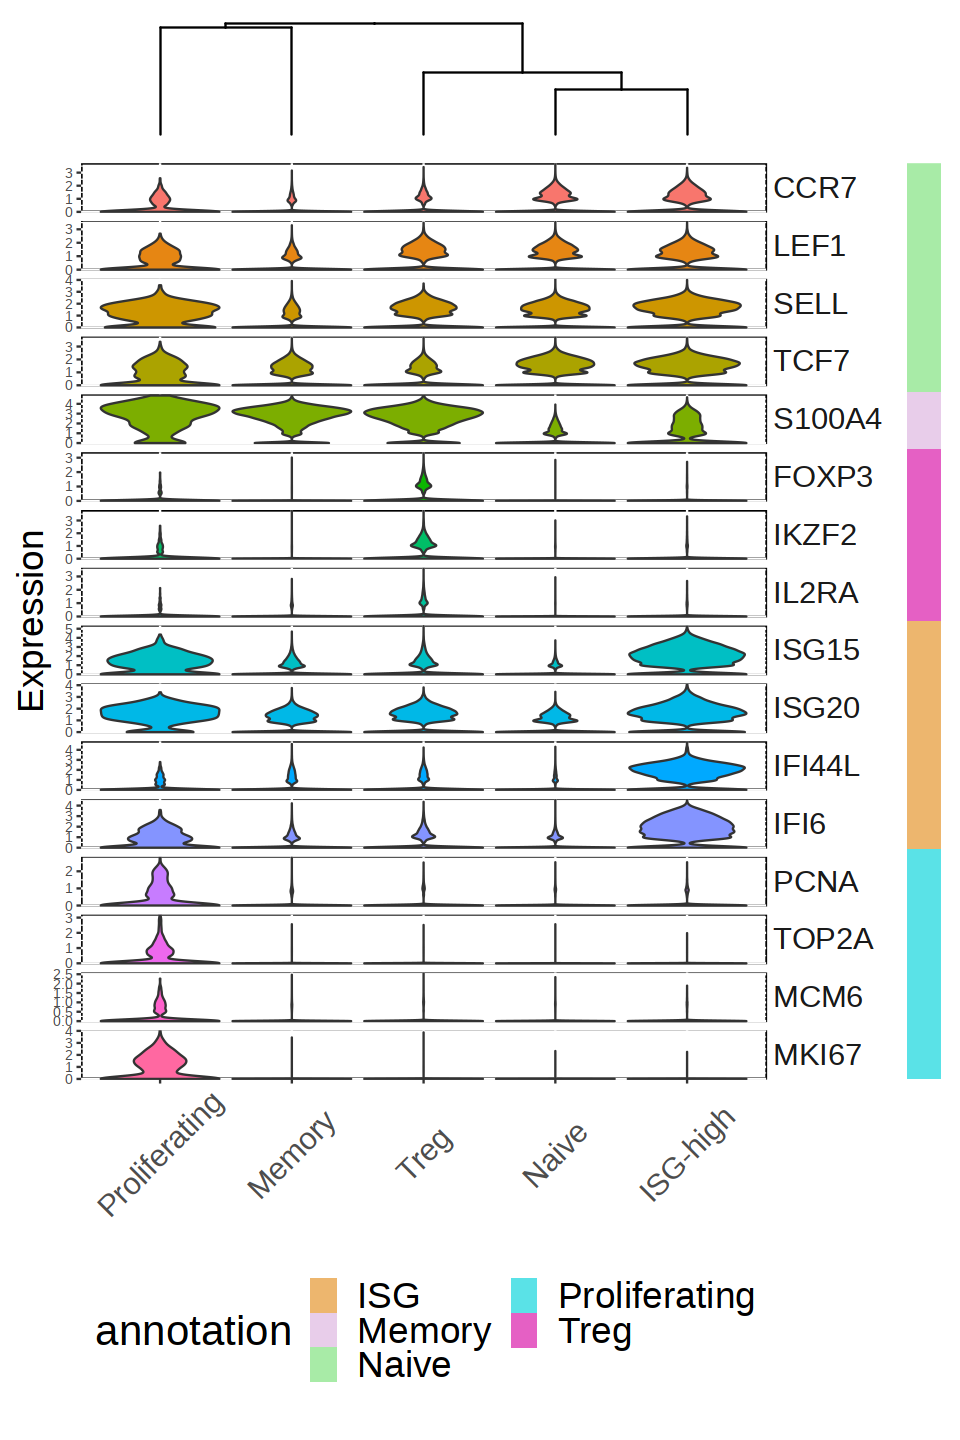

In [8]:
options(repr.plot.width = 8, repr.plot.height = 12)

p1 <- RunStackedVlnPlot(cd4.harmony.clean, 
                        ident = "clusters_grouped",
                        features = select.cd4.markers,
                        feature.annotation.cols = c('#EDB66E','#E8CDEA','#A8EBA7','#5AE2E7','#E560C4'),
                        color.by = "features",
                        column.names.rotation = 45,
                        row.fontsize = 8, column.fontsize=18, row.title.fontsize = 22, features.fontsize = 18,
                        legend.title.fontsize = 25, legend.fontsize = 22)
p1

## Figure 1d

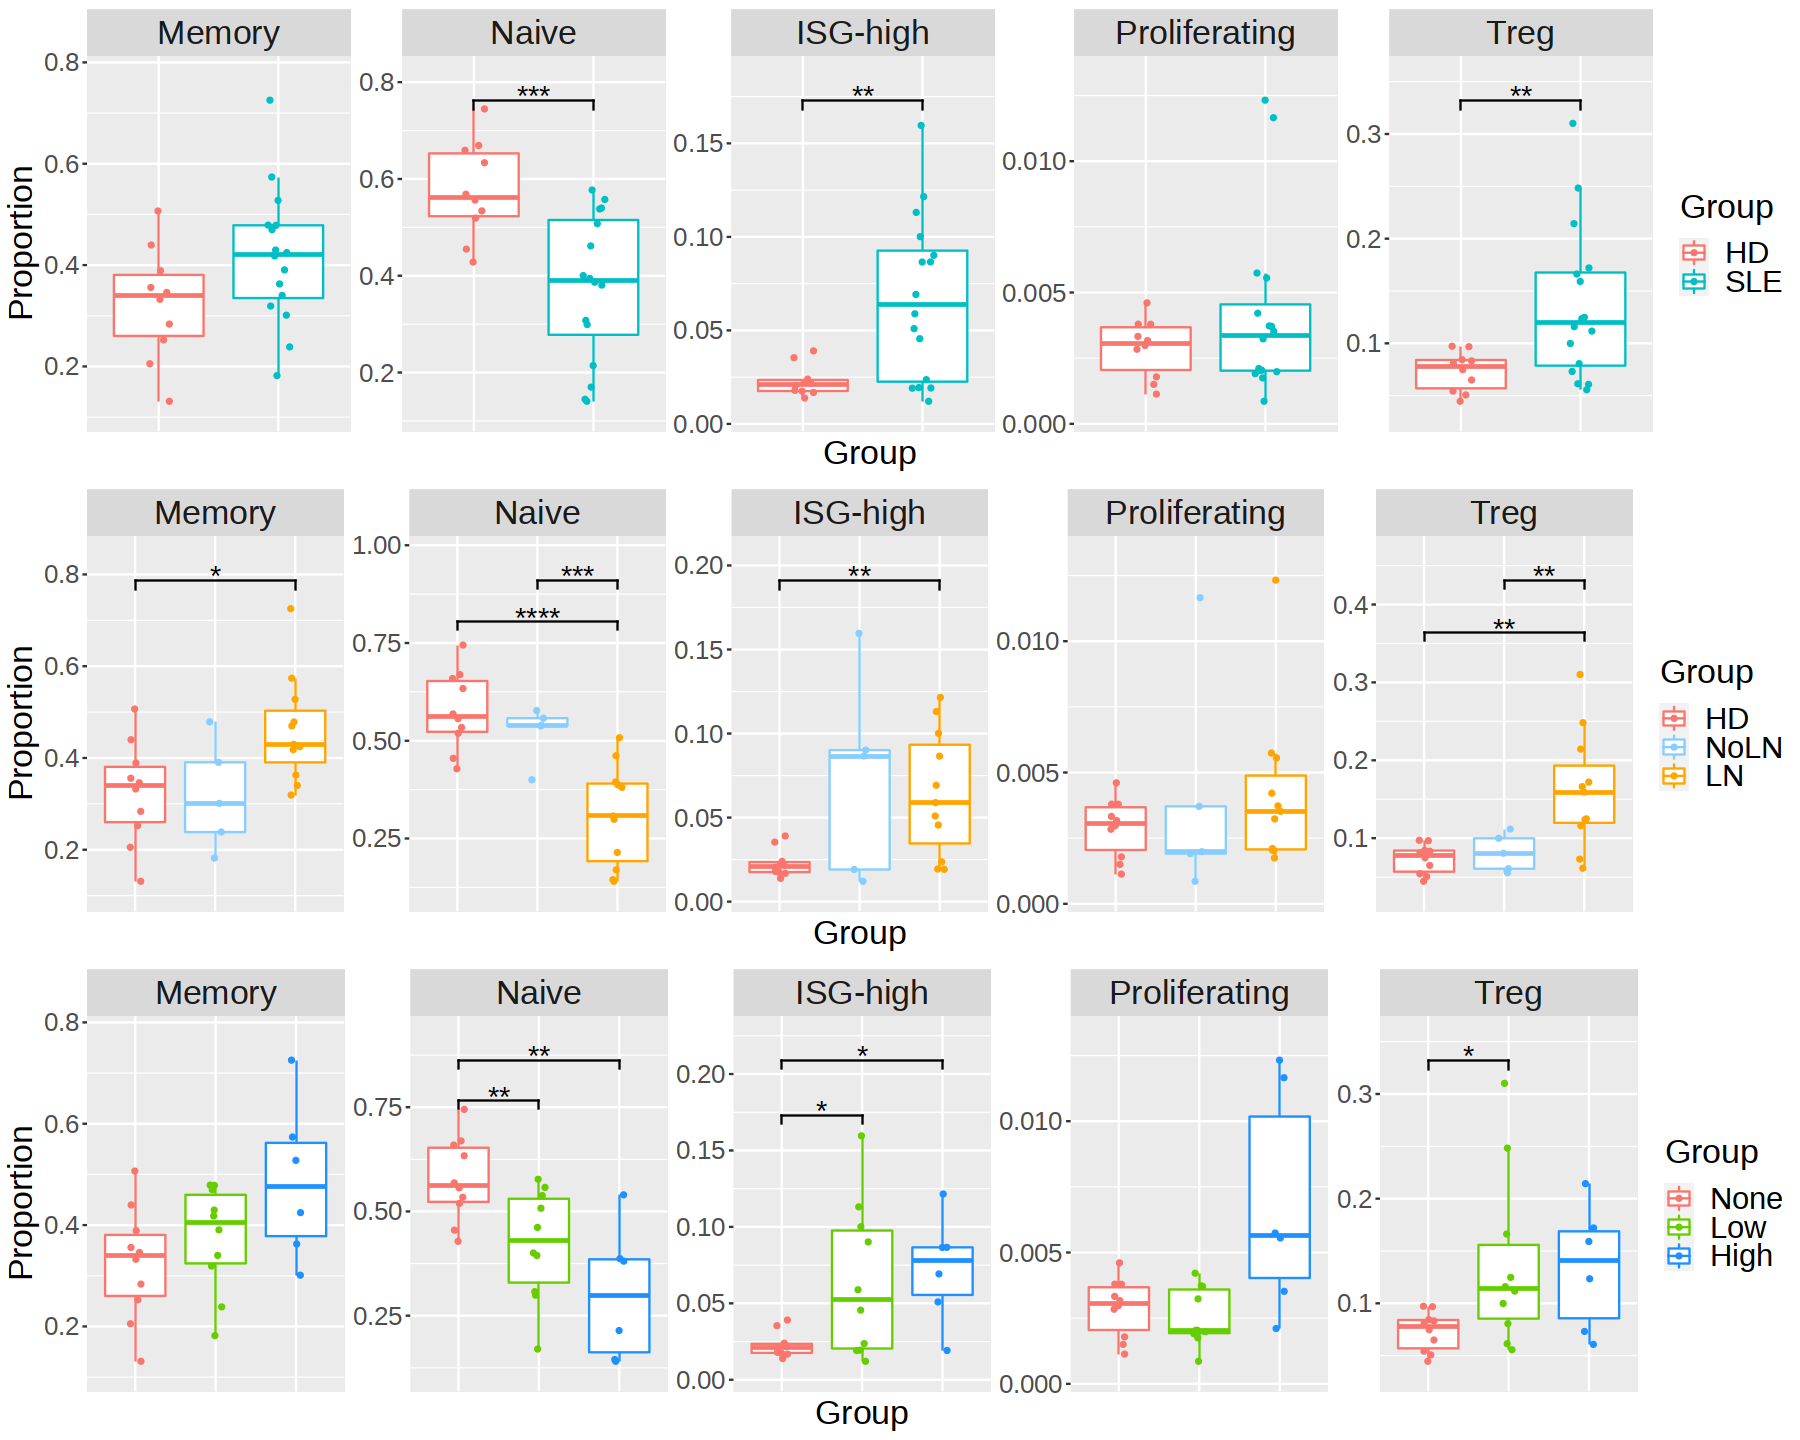

In [9]:
out1 <- RunProportionPlot(cd4.harmony.clean, ident = 'clusters_grouped',
                          group.by = "Group",
                          method = "unpooled",
                          unpool.by = "Sample_ID",
                          use.parent.as.ref = FALSE,
                          return.value = 'ggplot',
                          unpool.ncol = 5, group.colors = cols.group,
                          title.text.size = 20,
                          axis.title.size = 20,
                          axis.text.size = 15,
                          legend.title.size = 20,
                          legend.text.size = 18
)

out2 <- RunProportionPlot(cd4.harmony.clean, ident = 'clusters_grouped',
                          group.by = "Group_LN",
                          method = "unpooled",
                          unpool.by = "Sample_ID",
                          use.parent.as.ref = FALSE,
                          return.value = 'ggplot',
                          unpool.ncol = 5, group.colors = cols.ln,
                          title.text.size = 20,
                          axis.title.size = 20,
                          axis.text.size = 15,
                          legend.title.size = 20,
                          legend.text.size = 18
)

out3 <- RunProportionPlot(cd4.harmony.clean, ident = 'clusters_grouped',
                          group.by = "Group_SLEDAI",
                          method = "unpooled",
                          unpool.by = "Sample_ID",
                          use.parent.as.ref = FALSE,
                          return.value = 'ggplot',
                          unpool.ncol = 5, group.colors = cols.sledai,
                          title.text.size = 20,
                          axis.title.size = 20,
                          axis.text.size = 15,
                          legend.title.size = 20,
                          legend.text.size = 18
)


p1 <- plot_grid(out1, out2, out3, nrow = 3)
options(repr.plot.width = 15, repr.plot.height = 12)
p1

## Figure 1e

In [10]:
isg.list <- read.csv('IFN.IRG.fromNatImm_paper.csv')

In [11]:
my.isg <- split(isg.list$features, isg.list$group)

In [12]:
cols.column.anno <- list("Cluster" = cols.main.clus,
                         "Group" = cols.group)

In [13]:
cols.row.anno <- c('#DC9788','#A5CCD1','#BC72D4','#B2DF7A')
names(cols.row.anno) <- names(my.isg)

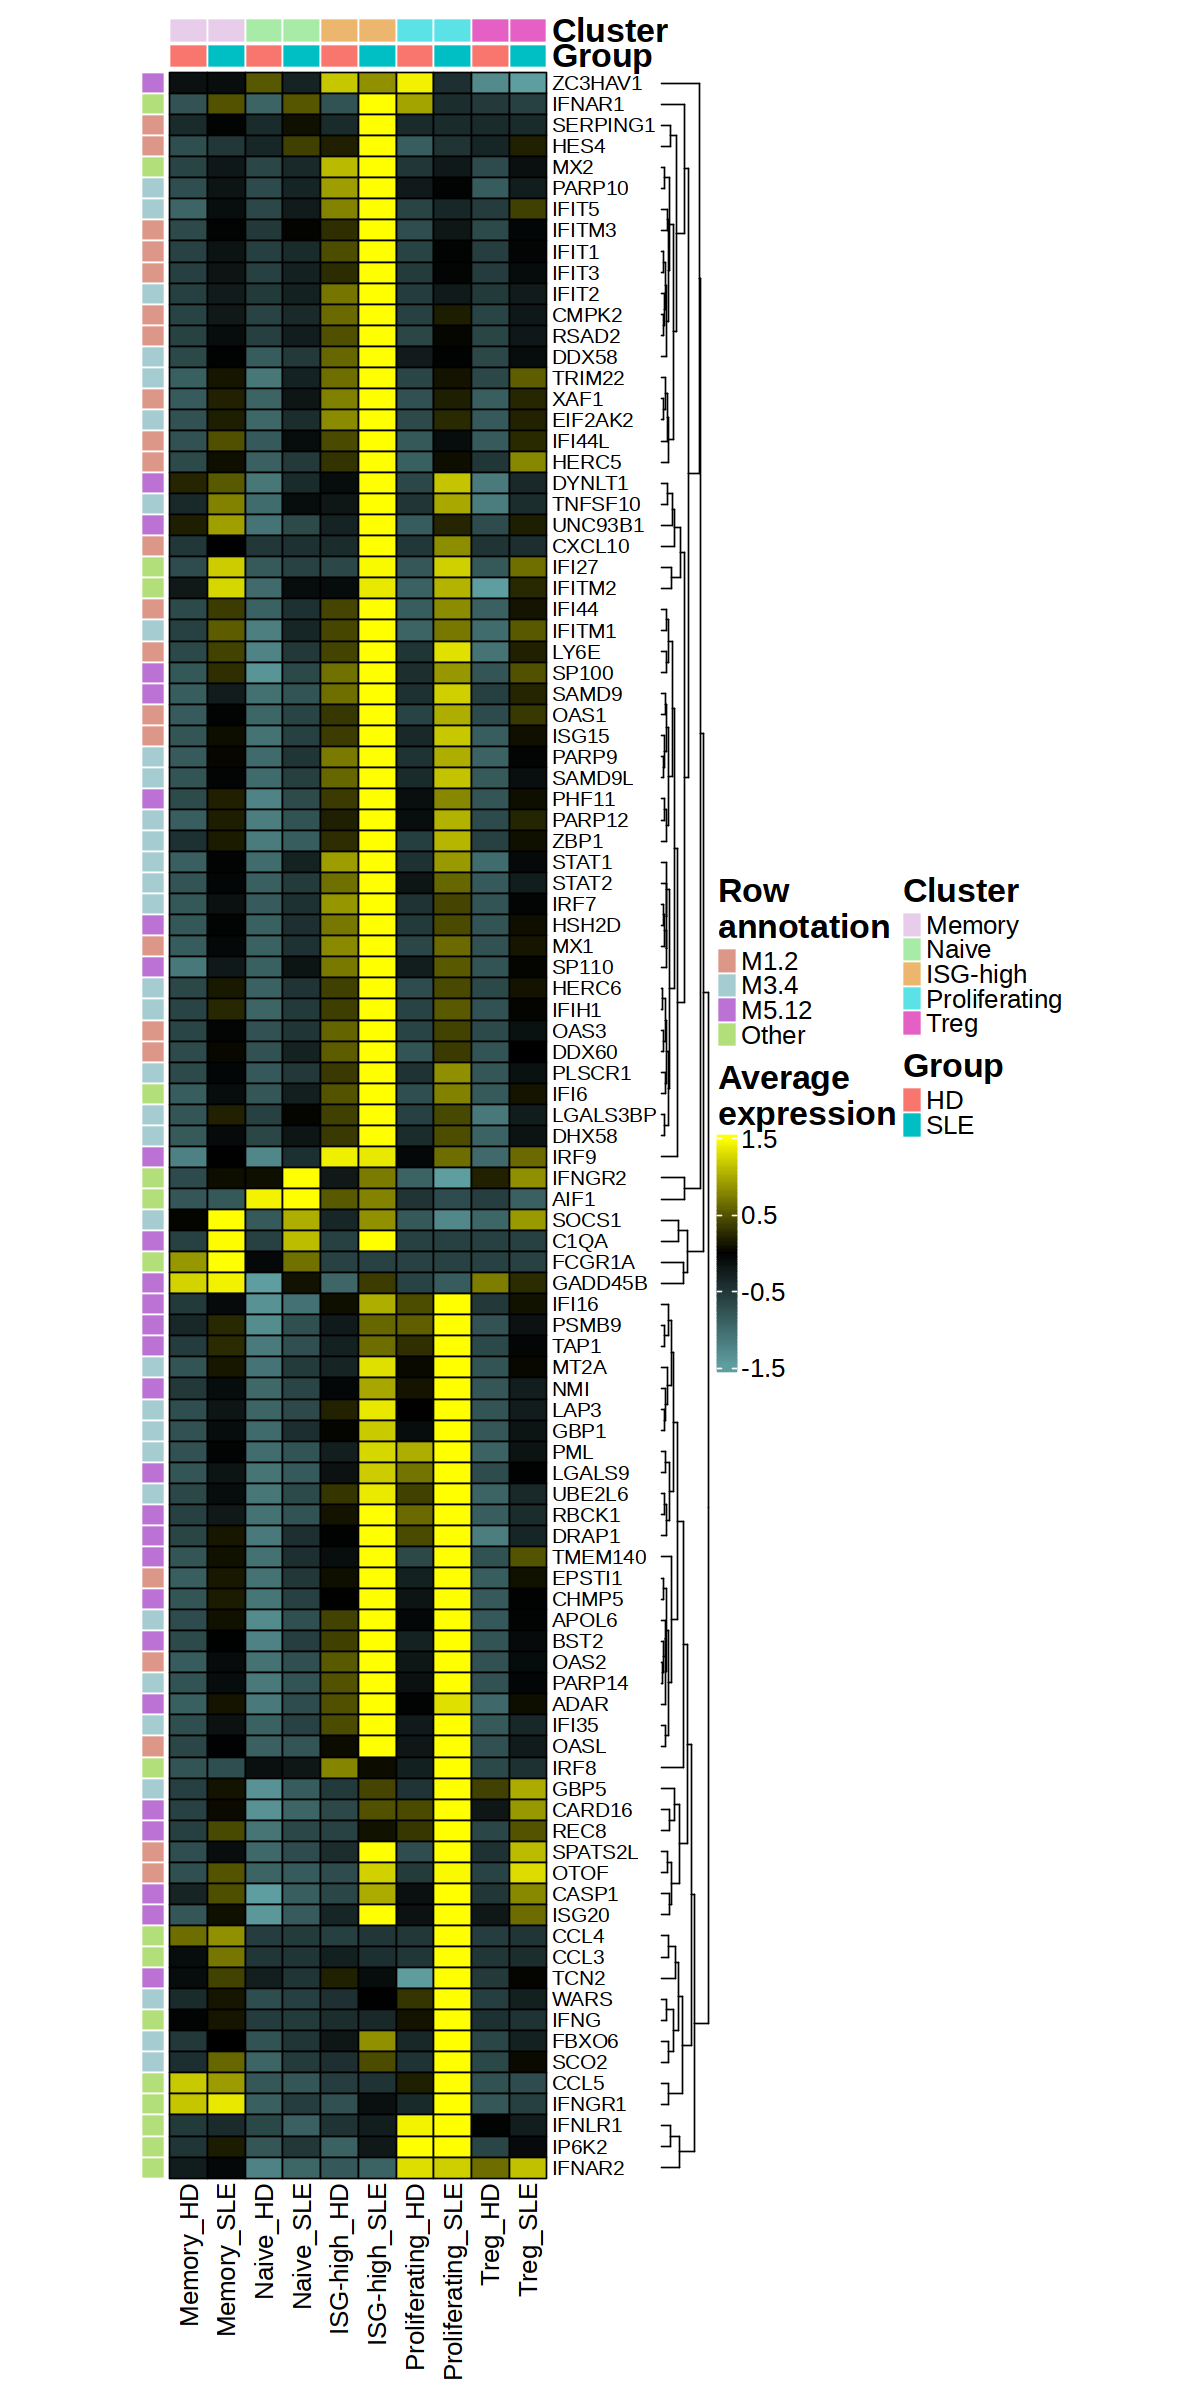

In [14]:
p1 <- RunSummarizedHeatmap(object = cd4.harmony.clean, 
                           max.exp = 1.5, min.exp = (-1.5),
                           ident = "clusters_grouped", 
                           features = my.isg, 
                           column.annotation.cols = cols.column.anno,
                           row.annotation.cols = cols.row.anno,
                           heatmap.width = 12, heatmap.height = 50, 
                           split.by = "Group", 
                           clust.column = FALSE, 
                           row.fontsize = 12,
                           column.fontsize = 15,
                           legend.label.fontsize = 15,
                           legend.title.fontsize = 20,
                           annotation.name.fontsize = 20)

options(repr.plot.width = 10, repr.plot.height = 20)
p1

## Figure 1f

In [15]:
my.isg.list <- unlist(my.isg)

In [16]:
patient.id <- unique(cd4.harmony.clean$Subject_ID)

In [17]:
isg.exp.mat <- matrix(0, length(my.isg.list), length(patient.id))

In [18]:
isg.exp <- GetAssayData(cd4.harmony.clean, assay = "RNA", slot = "data")[my.isg.list,]

In [19]:
for(i in 1:length(my.isg.list)){
    for(j in 1:length(patient.id)){
        isg.exp.mat[i,j] <- mean(isg.exp[i, which(cd4.harmony.clean$Subject_ID == patient.id[j])])
    }
}

In [20]:
colnames(isg.exp.mat) <- patient.id
rownames(isg.exp.mat) <- my.isg.list

In [21]:
avg.isg.exp <- colMeans(isg.exp.mat)

In [22]:
# Average ISG expression per cluster
kids <- unique(cd4.harmony.clean$clusters_grouped)
isg.exp.per.cluster.mat <- matrix(0, length(kids), length(patient.id))
for(i in 1:length(kids)){
    for(j in 1:length(patient.id)){
        dat <- colMeans(isg.exp[, which(cd4.harmony.clean$Subject_ID == patient.id[j] & cd4.harmony.clean$clusters_grouped == kids[i])])
        isg.exp.per.cluster.mat[i,j] <- mean(dat)
    }
}
rownames(isg.exp.per.cluster.mat) <- kids
colnames(isg.exp.per.cluster.mat) <- patient.id

In [23]:
isg.exp.per.cluster.df <- as.data.frame(t(isg.exp.per.cluster.mat))
colnames(isg.exp.per.cluster.df) <- c("Memory", "Naive", "ISG", "Proliferating","Treg")

In [24]:
my.match <- match(rownames(isg.exp.per.cluster.df), cd4.harmony.clean$Subject_ID)
isg.exp.per.cluster.df <- cbind(isg.exp.per.cluster.df,
                         patient = cd4.harmony.clean$Subject_ID[my.match],
                         sample = cd4.harmony.clean$Sample_ID[my.match],
                         SLEDAI = cd4.harmony.clean$SLEDAI[my.match],
                         SLEDAI.num = cd4.harmony.clean$SLEDAI.num[my.match],
                         Group = cd4.harmony.clean$Group[my.match],
                         Group_SLEDAI = cd4.harmony.clean$Group_SLEDAI[my.match],
                         Group_LN = cd4.harmony.clean$Group_LN[my.match],
                         Avg.ISG.exp = avg.isg.exp
                        )
isg.exp.per.cluster.df$SLEDAI.num[which(is.na(isg.exp.per.cluster.df$SLEDAI.num))] <- 0

`geom_smooth()` using formula 'y ~ x'



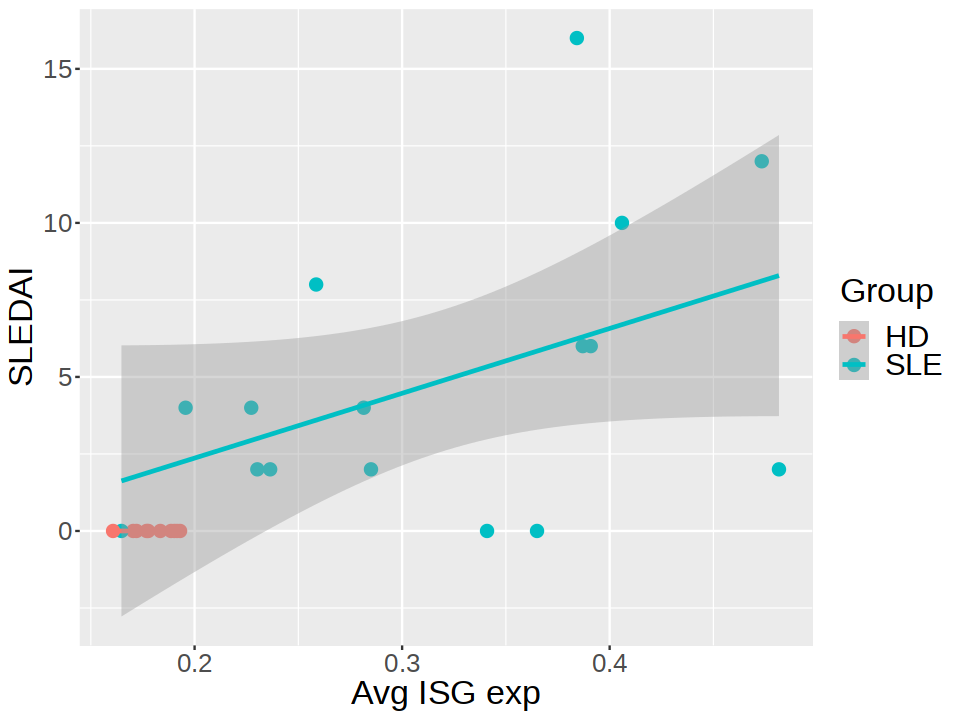

In [25]:
options(repr.plot.width = 8, repr.plot.height = 6)
p1 <- ggplot(isg.exp.per.cluster.df, aes(x=Avg.ISG.exp, y=SLEDAI.num, color = Group)) + 
      geom_point(size = 3)+
     geom_smooth(method=lm)+ labs(x = "Avg ISG exp", y = "SLEDAI") +
     theme(axis.text = element_text(size = 15), axis.title = element_text(size = 20), 
           legend.title = element_text(size = 20),legend.text = element_text(size = 18))
p1